In [20]:
from nltk.util import pr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

dataset ->https://www.kaggle.com/code/ifeoluwaoduwaiye/chatgpt-sentiment-analysis/input?select=file.csv

In [6]:
df = pd.read_csv("/content/drive/MyDrive/kaggle datasets/file.csv")

In [7]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [8]:
df.tail()

,Unnamed: 0,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


In [10]:
df.shape

(219294, 3)

In [11]:
df.info

<bound method DataFrame.info of         Unnamed: 0                                             tweets   labels
0                0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1                1  Try talking with ChatGPT, our new AI system wh...     good
2                2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3                3  THRILLED to share that ChatGPT, our new model ...     good
4                4  As of 2 minutes ago, @OpenAI released their ne...      bad
...            ...                                                ...      ...
219289      219289  Other Software Projects Are Now Trying to Repl...      bad
219290      219290  I asked #ChatGPT to write a #NYE Joke for SEOs...     good
219291      219291  chatgpt is being disassembled until it can onl...      bad
219292      219292  2023 predictions by #chatGPT. Nothing really s...      bad
219293      219293   From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0  neutral

[219294 rows x 3 co

In [13]:
df.isnull().sum()

Unnamed: 0    0
tweets        0
labels        0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
del df['Unnamed: 0']

In [21]:
def clean(text):
 text = str(text).lower()
 text = re.sub('\[.*?\]', '', text)
 text = re.sub('https?://\S+|www\.\S+', '', text)
 text = re.sub('<.*?>+', '', text)
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 text = re.sub('\n', '', text)
 text = re.sub('\w*\d\w*', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ".join(text)
 text = [stemmer.stem(word) for word in text.split(' ')]
 text=" ".join(text)
 return text

df["tweets"] = df["tweets"].apply(clean)

In [22]:
df.head()

,tweets,labels
0,chatgpt optim languag model dialogu openai,neutral
1,tri talk chatgpt new ai system optim dialogu f...,good
2,chatgpt optim languag model dialogu ai machin...,neutral
3,thrill share chatgpt new model optim dialog pu...,good
4,minut ago openai releas new chatgpt nnand use...,bad


In [23]:
df['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

<Axes: >

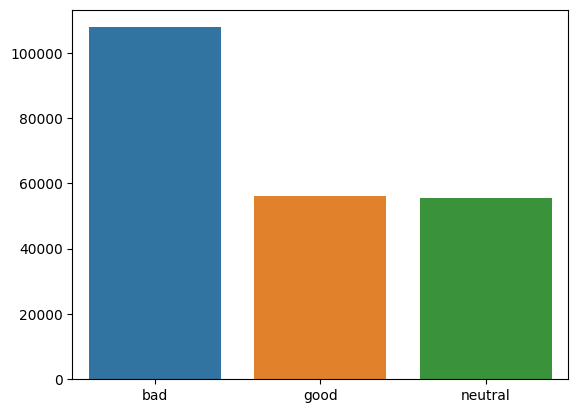

In [27]:
import seaborn as sns
label_counts = df['labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)


<Axes: ylabel='labels'>

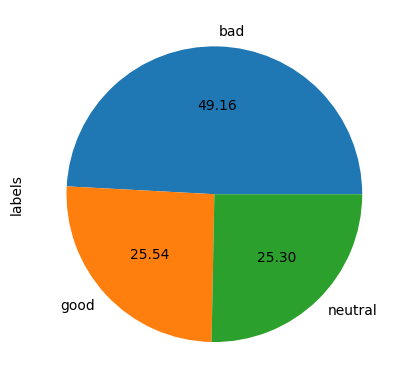

In [28]:
df['labels'].value_counts().plot(kind='pie',autopct='%.2f')

In [30]:
labels = df["labels"].value_counts()
numbers = labels.index
quantity = labels.values
import plotly.express as px
figure = px.pie(df,
 values=quantity,
 names=numbers,hole = 0.5)
figure.show()

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


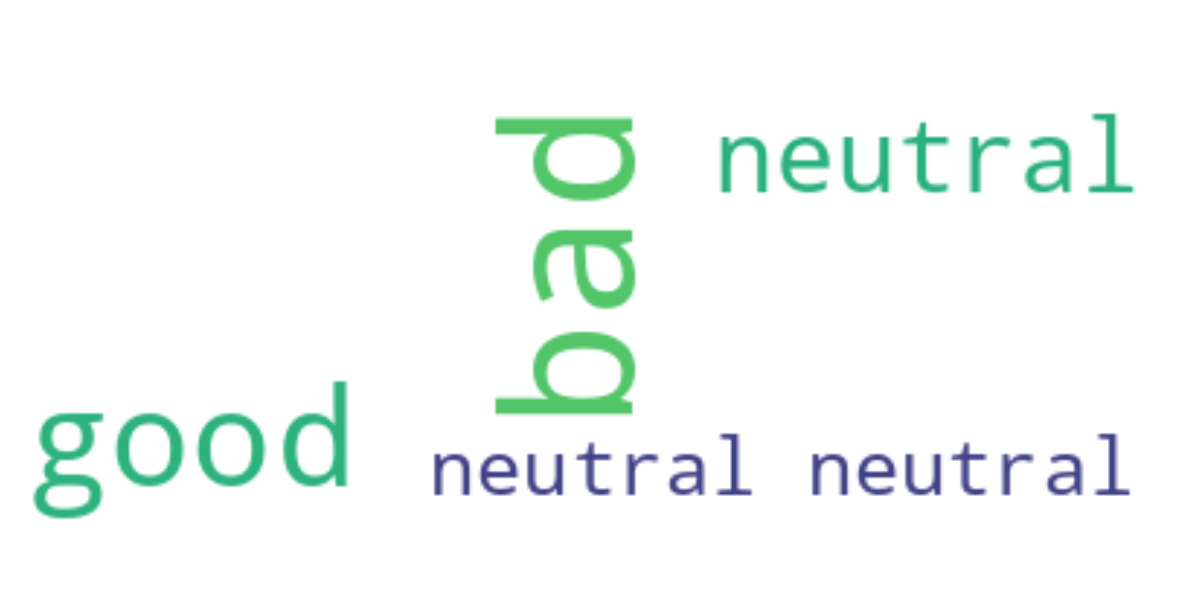

In [35]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

text = " ".join(i for i in df.labels)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


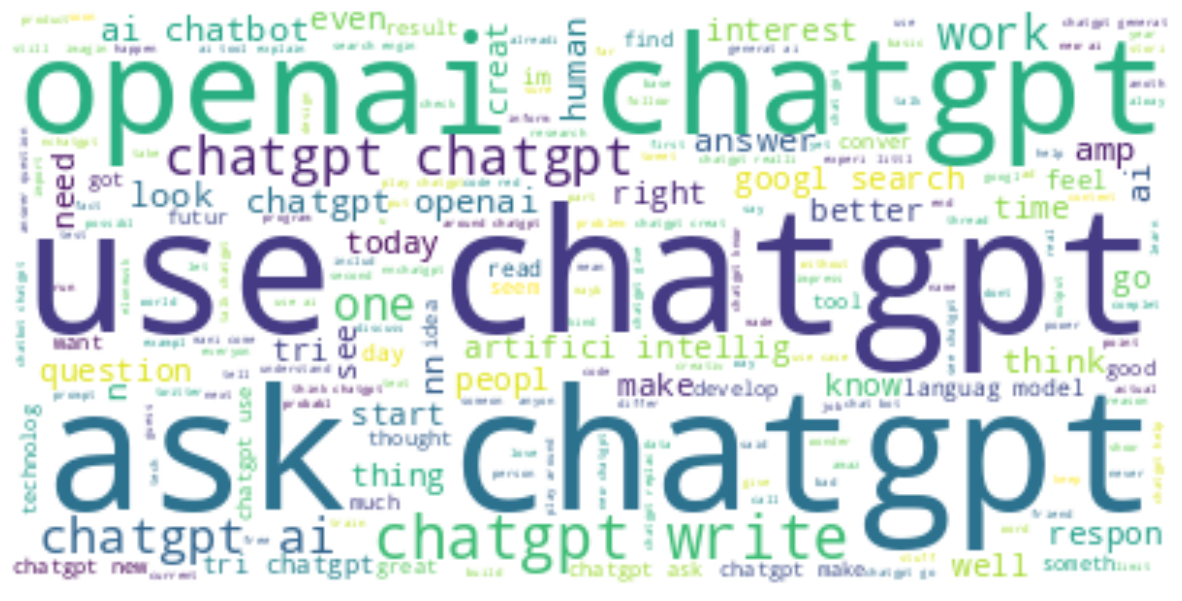

In [37]:
text = " ".join(i for i in df.tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
 background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
X = df['tweets']
Y = df['labels']

In [39]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [40]:
print(X)

  (0, 18069)	1
  (0, 87811)	1
  (0, 63492)	1
  (0, 73132)	1
  (0, 31060)	1
  (0, 87253)	1
  (1, 18069)	1
  (1, 87811)	1
  (1, 31060)	1
  (1, 122661)	1
  (1, 115953)	1
  (1, 77580)	1
  (1, 2194)	1
  (1, 115594)	1
  (1, 40734)	1
  (1, 51059)	1
  (1, 125978)	1
  (1, 55151)	1
  (2, 18069)	1
  (2, 87811)	1
  (2, 63492)	1
  (2, 73132)	1
  (2, 31060)	1
  (2, 2194)	1
  (2, 67874)	1
  :	:
  (219290, 79731)	1
  (219290, 82867)	1
  (219290, 85574)	1
  (219290, 49448)	1
  (219290, 50721)	1
  (219290, 77887)	1
  (219291, 18069)	1
  (219291, 31835)	1
  (219291, 32196)	1
  (219292, 18069)	1
  (219292, 98853)	1
  (219292, 106117)	1
  (219292, 90006)	1
  (219292, 133676)	1
  (219292, 6922)	1
  (219292, 28648)	1
  (219292, 122588)	1
  (219292, 121700)	1
  (219292, 94110)	1
  (219292, 83814)	1
  (219292, 111482)	1
  (219292, 84729)	1
  (219293, 18069)	1
  (219293, 113876)	1
  (219293, 76907)	1


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [42]:
print(Y)

[2 1 2 ... 0 0 2]


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [44]:
print(X_train.shape, X_test.shape, Y_train.shape)

(146926, 135976) (72368, 135976) (146926,)


In [45]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score
#traing dataset accuracy score
train_test = lg.predict(X_train)
accuracy_score(train_test,Y_train)

0.9091583518233669

In [48]:
test_data = lg.predict(X_test)
accuracy_score(test_data, Y_test)

0.8460092858722087

In [49]:
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
preds = lg.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     35518
           1       0.86      0.83      0.84     18508
           2       0.74      0.70      0.72     18342

    accuracy                           0.85     72368
   macro avg       0.83      0.82      0.82     72368
weighted avg       0.84      0.85      0.84     72368



In [50]:
#using from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [51]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
#traing dataset accuracy score
train_test = DT.predict(X_train)
accuracy_score(train_test,Y_train)

0.9992921606795258

In [53]:
#test dataset accuracy score
test_data = DT.predict(X_test)
accuracy_score(test_data, Y_test)

0.7875718549635198

In [54]:
#classification report
preds = DT.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     35518
           1       0.75      0.73      0.74     18508
           2       0.64      0.68      0.66     18342

    accuracy                           0.79     72368
   macro avg       0.76      0.76      0.76     72368
weighted avg       0.79      0.79      0.79     72368



In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [56]:
preds = nb.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     35518
           1       0.63      0.81      0.71     18508
           2       0.58      0.30      0.39     18342

    accuracy                           0.72     72368
   macro avg       0.67      0.66      0.65     72368
weighted avg       0.70      0.72      0.70     72368



In [57]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [58]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppr

[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [59]:
grid_search.best_params_

{'alpha': 1.0}